In [ ]:
from google.colab import files
uploaded = files.upload()


Saving SML.csv to SML.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

# Load CSV file
df = pd.read_csv("SML.csv")

# Convert 'Date' to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Show the first 5 rows
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-29,193.9,194.40,191.73,192.53,191.13,42628800.0
2023-12-28,194.14,194.66,193.17,193.58,192.17,34049900.0
2023-12-27,192.49,193.50,191.09,193.15,191.75,48087700.0
2023-12-26,193.61,193.89,192.83,193.05,191.65,28919300.0
2023-12-22,195.18,195.41,192.97,193.60,192.19,37122800.0


In [ ]:
# Strip spaces from column names just in case
df.columns = df.columns.str.strip()

# Choose the best available column for price
price_col = 'Close'

# Calculate returns
returns = df[price_col].pct_change().dropna()



<ipython-input-4-c7b4269fc6f6>:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df[price_col].pct_change().dropna()


In [ ]:
# Mean and std of returns
mean = returns.mean()
std = returns.std()

# Perform K–S test
ks_stat, p_value = kstest(returns, 'norm', args=(mean, std))

print(f"Kolmogorov–Smirnov Statistic: {ks_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Conclusion: Returns do NOT follow a normal distribution (reject H0).")
else:
    print("Conclusion: Returns may follow a normal distribution (fail to reject H0).")


Kolmogorov–Smirnov Statistic: 0.0451
P-Value: 0.6598
Conclusion: Returns may follow a normal distribution (fail to reject H0).


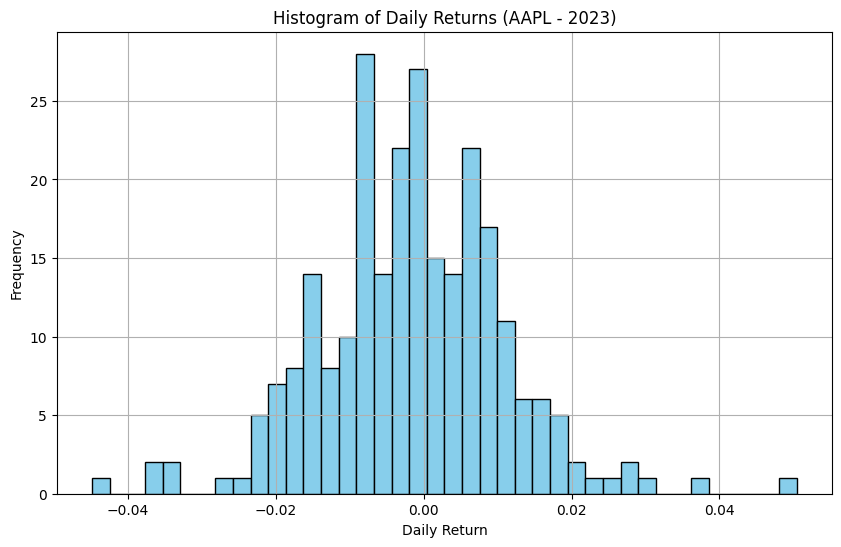

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=40, color='skyblue', edgecolor='black')
plt.title("Histogram of Daily Returns (AAPL - 2023)")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
